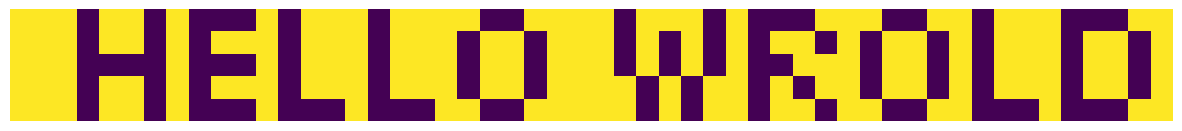

In [1]:
import os
import sys
import time
import numpy as np
import matplotlib.pyplot as plt

import pickle



hello = np.array([
                        [0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0],
                        [0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0],
                        [0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0],
                        [0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0],
                        [0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0]])

world = np.array([
                        [0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0],
                        [0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0],
                        [0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0],
                        [0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0],
                        [0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0]])

hello_world = np.concatenate((hello, world), axis=1)

fig = plt.figure(figsize = np.array(hello_world.shape)*3)

ax = fig.add_subplot(111)
ax.imshow(1-hello_world)


ax.axis('off')

plt.show()

plt.clf()



In [2]:
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, Dropout, concatenate, UpSampling2D
from keras.layers import BatchNormalization, Add, Activation

# U-Netモデルの定義
def unet(input_size=(9, 128, 128)):
    inputs = Input(input_size)
    
    
    '''
    # エンコーダーパス
    conv1 = Conv2D(64, 3, activation="relu", padding="same", data_format="channels_first")(inputs)
    conv1 = Conv2D(64, 3, activation="relu", padding="same", data_format="channels_first")(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2), data_format="channels_first")(conv1)

    conv2 = Conv2D(128, 3, activation="relu", padding="same", data_format="channels_first")(pool1)
    conv2 = Conv2D(128, 3, activation="relu", padding="same", data_format="channels_first")(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2), data_format="channels_first")(conv2)
    
    '''

    #conv3 = Conv2D(256, 3, activation="relu", padding="same")(pool2)
    
    conv3 = Conv2D(256, 3, activation="relu", padding="same", data_format="channels_first")(inputs)
    conv3 = Conv2D(256, 3, activation="relu", padding="same", data_format="channels_first")(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2), data_format="channels_first")(conv3)

    conv4 = Conv2D(512, 3, activation="relu", padding="same", data_format="channels_first")(pool3)
    conv4 = Conv2D(512, 3, activation="relu", padding="same", data_format="channels_first")(conv4)
    drop4 = Dropout(0.5)(conv4)
    
    pool4 = MaxPooling2D(pool_size=(2, 2), data_format="channels_first")(drop4)
    
    
    conv5 = Conv2D(1024, 3, activation="relu", padding="same", data_format="channels_first")(pool4)
    conv5 = Conv2D(1024, 3, activation="relu", padding="same", data_format="channels_first")(conv5)
    drop5 = Dropout(0.5)(conv5)
    
    
    
    
    res = residual_block(drop5, 1024, 3)
    #res = residual_block(drop4, 512, 3)
    #res = residual_block(res, 512, 3)
    #res = residual_block(res, 512, 3)
    #res = residual_block(res, 1024, 3)
    #res = residual_block(res, 1024, 3)
    #res = residual_block(res, 1024, 3)
    #res = residual_block(res, 1024, 3)
    #res = residual_block(res, 1024, 3)
    
    

    # デコーダーパス
    
    up6 = Conv2D(512, 2, activation="relu", padding="same", data_format="channels_first")(UpSampling2D(size=(2, 2), data_format="channels_first")(res))
    merge6 = concatenate([conv4, up6], axis=1)
    conv6 = Conv2D(512, 3, activation="relu", padding="same", data_format="channels_first")(merge6)
    conv6 = Conv2D(512, 3, activation="relu", padding="same", data_format="channels_first")(conv6)
    

    up7 = Conv2D(256, 2, activation="relu", padding="same", data_format="channels_first")(UpSampling2D(size=(2, 2), data_format="channels_first")(conv6))
    merge7 = concatenate([conv3, up7], axis=1)
    conv7 = Conv2D(256, 3, activation="relu", padding="same", data_format="channels_first")(merge7)
    conv7 = Conv2D(256, 3, activation="relu", padding="same", data_format="channels_first")(conv7)

    up8 = Conv2D(128, 2, activation="relu", padding="same", data_format="channels_first")(UpSampling2D(size=(2, 2), data_format="channels_first")(conv7))
    #merge8 = concatenate([conv2, up8], axis=1)
    #conv8 = Conv2D(128, 3, activation="relu", padding="same")(merge8)
    conv8 = Conv2D(128, 3, activation="relu", padding="same", data_format="channels_first")(up8)
    conv8 = Conv2D(128, 3, activation="relu", padding="same", data_format="channels_first")(conv8)
    
    up9 = Conv2D(64, 2, activation="relu", padding="same", data_format="channels_first")(UpSampling2D(size=(2, 2), data_format="channels_first")(conv8))
    #merge9 = concatenate([conv1, up9], axis=1)
    #conv9 = Conv2D(64, 3, activation="relu", padding="same")(merge9)
    conv9 = Conv2D(64, 3, activation="relu", padding="same", data_format="channels_first")(up9)
    conv9 = Conv2D(64, 3, activation="relu", padding="same", data_format="channels_first")(conv9)
    
    outputs = Conv2D(1, 1, activation="linear", data_format="channels_first")(conv9)

    model = Model(inputs, outputs)
    return model

        
        
# Residual Blockの定義
def residual_block(input_tensor, filters, kernel_size):
    x = Conv2D(filters, kernel_size, padding='same', data_format="channels_first")(input_tensor)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Conv2D(filters, kernel_size, padding='same', data_format="channels_first")(x)
    x = BatchNormalization()(x)
    x = Add()([x, input_tensor])
    x = Activation('relu')(x)
    return x



Umodel = unet()


Umodel.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 9, 128, 128  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 256, 128, 12  20992       ['input_1[0][0]']                
                                8)                                                                
                                                                                                  
 conv2d_1 (Conv2D)              (None, 256, 128, 12  590080      ['conv2d[0][0]']                 
                                8)                                                            

In [3]:
!pip install scikit-learn

You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [4]:
!ls ../../../masaki_data/training_data/Large/training/

input.npz		output_High-pass_8.npz	output_bx_obs_5.npz
input9.npz		output_bx_0.npz		output_bx_obs_6.npz
input_100.npz		output_bx_1.npz		output_bx_obs_7.npz
input_skip1.npz		output_bx_2.npz		output_bx_obs_8.npz
input_skip3.npz		output_bx_3.npz		output_vx_0.npz
input_skip6.npz		output_bx_4.npz		output_vx_1.npz
input_skip6_obs.npz	output_bx_5.npz		output_vx_2.npz
output_High-pass_0.npz	output_bx_6.npz		output_vx_3.npz
output_High-pass_1.npz	output_bx_7.npz		output_vx_4.npz
output_High-pass_2.npz	output_bx_8.npz		output_vx_5.npz
output_High-pass_3.npz	output_bx_obs_0.npz	output_vx_6.npz
output_High-pass_4.npz	output_bx_obs_1.npz	output_vx_7.npz
output_High-pass_5.npz	output_bx_obs_2.npz	output_vx_8.npz
output_High-pass_6.npz	output_bx_obs_3.npz
output_High-pass_7.npz	output_bx_obs_4.npz


loading  training/input_skip6.npz
loading  validation/input_skip6.npz
loading from output_2.npz
Epoch 1/8
3189/3189 [==============================] - ETA: 0s - loss: 0.9930 - correlation_coefficient: 0.3531

/usr/local/lib/python3.8/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


3189/3189 [==============================] - 613s 190ms/step - loss: 0.9930 - correlation_coefficient: 0.3531 - val_loss: 0.8573 - val_correlation_coefficient: 0.3834
Epoch 2/8
3189/3189 [==============================] - 602s 189ms/step - loss: 0.8447 - correlation_coefficient: 0.3957 - val_loss: 0.8461 - val_correlation_coefficient: 0.3946
Epoch 3/8
3189/3189 [==============================] - 600s 188ms/step - loss: 0.8228 - correlation_coefficient: 0.4223 - val_loss: 0.8491 - val_correlation_coefficient: 0.3903
Epoch 4/8
3189/3189 [==============================] - 600s 188ms/step - loss: 0.7923 - correlation_coefficient: 0.4570 - val_loss: 0.8582 - val_correlation_coefficient: 0.3794


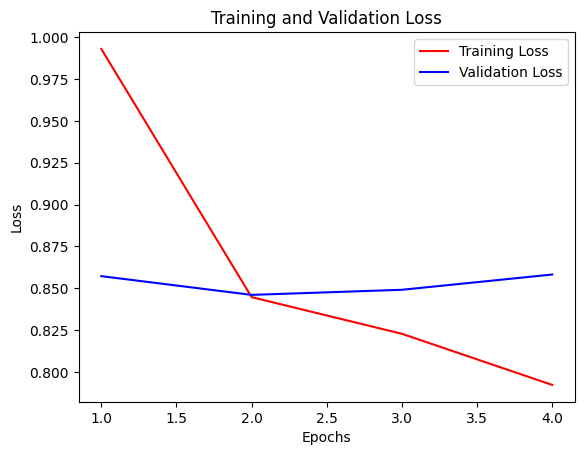

savaing at ./model/model_2.h5
loading from output_3.npz
Epoch 1/8
3189/3189 [==============================] - 607s 190ms/step - loss: 0.8942 - correlation_coefficient: 0.3430 - val_loss: 0.8665 - val_correlation_coefficient: 0.3654
Epoch 2/8
3189/3189 [==============================] - 604s 189ms/step - loss: 0.8642 - correlation_coefficient: 0.3695 - val_loss: 0.8614 - val_correlation_coefficient: 0.3726
Epoch 3/8
3189/3189 [==============================] - 602s 189ms/step - loss: 0.8569 - correlation_coefficient: 0.3792 - val_loss: 0.8623 - val_correlation_coefficient: 0.3714
Epoch 4/8
3189/3189 [==============================] - 601s 188ms/step - loss: 0.8495 - correlation_coefficient: 0.3886 - val_loss: 0.8624 - val_correlation_coefficient: 0.3719


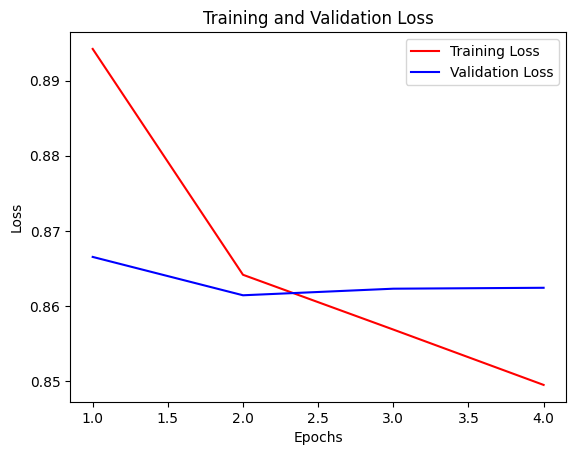

savaing at ./model/model_3.h5
loading from output_4.npz
Epoch 1/8
3189/3189 [==============================] - 608s 190ms/step - loss: 0.9247 - correlation_coefficient: 0.2879 - val_loss: 0.9060 - val_correlation_coefficient: 0.3068
Epoch 2/8
3189/3189 [==============================] - 603s 189ms/step - loss: 0.9021 - correlation_coefficient: 0.3135 - val_loss: 0.9021 - val_correlation_coefficient: 0.3142
Epoch 3/8
3189/3189 [==============================] - 602s 189ms/step - loss: 0.8976 - correlation_coefficient: 0.3204 - val_loss: 0.8982 - val_correlation_coefficient: 0.3195
Epoch 4/8
3189/3189 [==============================] - 601s 189ms/step - loss: 0.8949 - correlation_coefficient: 0.3246 - val_loss: 0.8973 - val_correlation_coefficient: 0.3211
Epoch 5/8
3189/3189 [==============================] - 601s 188ms/step - loss: 0.8929 - correlation_coefficient: 0.3275 - val_loss: 0.8960 - val_correlation_coefficient: 0.3225
Epoch 6/8
3189/3189 [==============================] - 601s

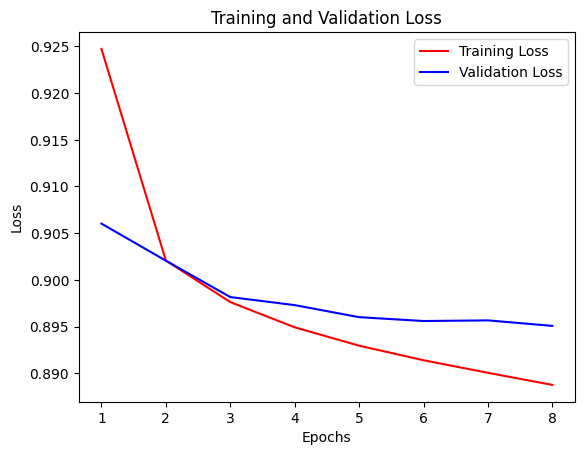

savaing at ./model/model_4.h5
loading from output_5.npz
Epoch 1/8
3189/3189 [==============================] - 609s 191ms/step - loss: 0.8628 - correlation_coefficient: 0.3779 - val_loss: 0.8422 - val_correlation_coefficient: 0.3997
Epoch 2/8
3189/3189 [==============================] - 606s 190ms/step - loss: 0.8342 - correlation_coefficient: 0.4077 - val_loss: 0.8346 - val_correlation_coefficient: 0.4074
Epoch 3/8
3189/3189 [==============================] - 605s 190ms/step - loss: 0.8303 - correlation_coefficient: 0.4123 - val_loss: 0.8321 - val_correlation_coefficient: 0.4100
Epoch 4/8
3189/3189 [==============================] - 605s 190ms/step - loss: 0.8283 - correlation_coefficient: 0.4148 - val_loss: 0.8314 - val_correlation_coefficient: 0.4109
Epoch 5/8
3189/3189 [==============================] - 605s 190ms/step - loss: 0.8268 - correlation_coefficient: 0.4165 - val_loss: 0.8296 - val_correlation_coefficient: 0.4129
Epoch 6/8
3189/3189 [==============================] - 604s

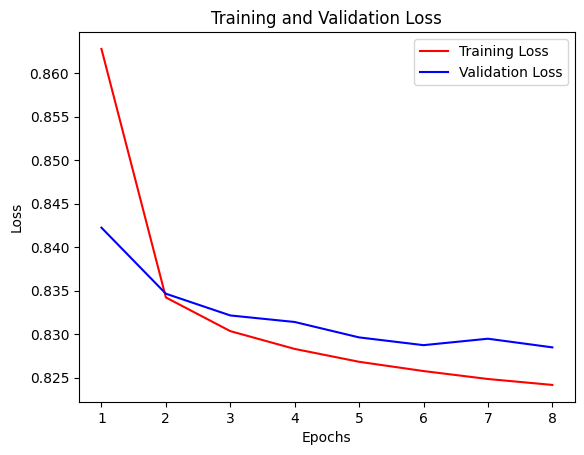

savaing at ./model/model_5.h5
loading from output_6.npz
Epoch 1/8
3189/3189 [==============================] - 607s 190ms/step - loss: 0.5657 - correlation_coefficient: 0.6639 - val_loss: 0.5251 - val_correlation_coefficient: 0.6894
Epoch 2/8
3189/3189 [==============================] - 604s 189ms/step - loss: 0.5152 - correlation_coefficient: 0.6968 - val_loss: 0.5209 - val_correlation_coefficient: 0.6947
Epoch 3/8
3189/3189 [==============================] - 604s 189ms/step - loss: 0.5101 - correlation_coefficient: 0.7004 - val_loss: 0.5137 - val_correlation_coefficient: 0.6981
Epoch 4/8
3189/3189 [==============================] - 603s 189ms/step - loss: 0.5073 - correlation_coefficient: 0.7023 - val_loss: 0.5116 - val_correlation_coefficient: 0.6995
Epoch 5/8
3189/3189 [==============================] - 603s 189ms/step - loss: 0.5054 - correlation_coefficient: 0.7036 - val_loss: 0.5092 - val_correlation_coefficient: 0.7009
Epoch 6/8
3189/3189 [==============================] - 603s

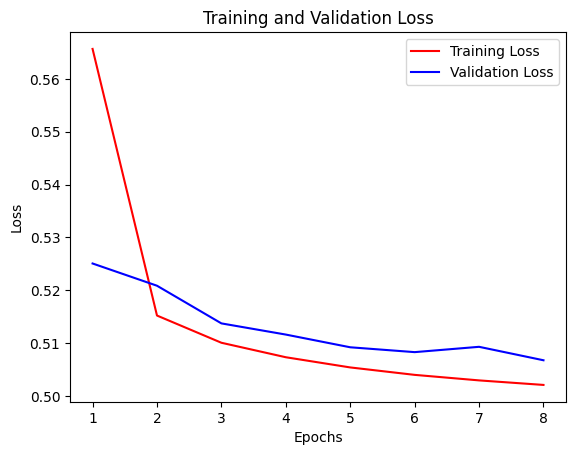

savaing at ./model/model_6.h5
loading from output_7.npz
Epoch 1/8
3189/3189 [==============================] - 610s 191ms/step - loss: 1.1091 - correlation_coefficient: 0.6689 - val_loss: 0.4876 - val_correlation_coefficient: 0.7191
Epoch 2/8
3189/3189 [==============================] - 606s 190ms/step - loss: 0.4794 - correlation_coefficient: 0.7231 - val_loss: 0.4674 - val_correlation_coefficient: 0.7312
Epoch 3/8
3189/3189 [==============================] - 606s 190ms/step - loss: 0.4628 - correlation_coefficient: 0.7342 - val_loss: 0.4652 - val_correlation_coefficient: 0.7364
Epoch 4/8
3189/3189 [==============================] - 605s 190ms/step - loss: 0.4550 - correlation_coefficient: 0.7393 - val_loss: 0.4537 - val_correlation_coefficient: 0.7407
Epoch 5/8
2771/3189 [=========================>....] - ETA: 1:17 - loss: 0.4506 - correlation_coefficient: 0.7423

In [ ]:
import tensorflow as tf
import gc
from keras import backend as K
from keras.callbacks import EarlyStopping, ModelCheckpoint, CSVLogger

from sklearn.model_selection import train_test_split


def correlation_coefficient(y_true, y_pred):
    # 相関係数の計算
    y_true_mean = tf.reduce_mean(y_true)  # y_trueの平均値を計算
    y_pred_mean = tf.reduce_mean(y_pred)  # y_predの平均値を計算
    numerator = tf.reduce_sum((y_true - y_true_mean) * (y_pred - y_pred_mean))  # 分子の計算
    denominator = tf.sqrt(tf.reduce_sum(tf.square(y_true - y_true_mean)) * tf.reduce_sum(tf.square(y_pred - y_pred_mean)))  # 分母の計算
    corr = numerator / denominator  # 相関係数の計算
    return corr


file_name = 'input_skip6'

print('loading  training/{}.npz'.format(file_name))

data_dir = '../../../masaki_data/training_data/Large2/'

x_train = np.load('../../../masaki_data/training_data/Large2/training/{}_obs.npz'.format(file_name))
x_train = x_train['arr_0']


print('loading  validation/{}.npz'.format(file_name))
x_val = np.load('../../../masaki_data/training_data/Large2/validation/{}_obs.npz'.format(file_name))
x_val = x_val['arr_0']

for s in range(2,9):
    print('loading from output_{}.npz'.format(s))
    y_train = np.load('../../../masaki_data/training_data/Large/training/output_vx_{}.npz'.format(s))
    y_train = y_train['arr_0'][0:x_train.shape[0]]
    
    y_val = np.load('../../../masaki_data/training_data/Large/validation/output_vx_{}.npz'.format(s))
    y_val = y_val['arr_0'][0:x_val.shape[0]]
    
    #x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)
    
    early_stopping = EarlyStopping(monitor='val_correlation_coefficient', patience=2, mode = 'max')
    model_checkpoint = ModelCheckpoint('./model/model_{}.h5'.format(s), 
                                       monitor='val_correlation_coefficient', mode = 'max', save_best_only=True)
    csv_logger = CSVLogger('./history/history_{}.csv'.format(s))
    
    
    model = unet()
    
    model.compile(optimizer='adam', loss='mse', metrics=[correlation_coefficient])

    history = model.fit(x_train, y_train, batch_size=4, epochs=8, validation_data=(x_val, y_val),
                 callbacks=[early_stopping, model_checkpoint, csv_logger])
    
    
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(train_loss) + 1)

    plt.plot(epochs, train_loss, 'r', label='Training Loss')
    plt.plot(epochs, val_loss, 'b', label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    
    del model
    K.clear_session()
    gc.collect()
    
    print('savaing at ./model/model_{}.h5'.format(s))
    #model.save('./model/model_{}.h5'.format(s))

    with open('./history/history_{}.pkl'.format(s), 'wb') as f:
        pickle.dump(history.history, f)

    

In [ ]:
print(x_train.shape)

In [ ]:
sys.exit()



In [ ]:


#pred = Umodel.predict(x[30:20])

#print(pred)



input_data = np.random.random((10, 3, 512, 512))  # 入力データの例（適宜変更してください）

# 推論を行う
predictions = Umodel.predict(input_data)

# 推論結果の表示
print(type(predictions))
print(predictions.shape)


In [ ]:
start = time.time()

print('loading...', end = '\r')
sli = 6
otp = np.load('/scr/s003/masakihr/training_data/Large/training/output_{}.npz'.format(sli))
y = otp['arr_0']

inp = np.load('/scr/s003/masakihr/training_data/Large/training/input.npz')
x = inp['arr_0']

#print(y.shape, x.shape)

print('loaded in ', time.time()-start, '[sec]')

In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split


def correlation_coefficient(y_true, y_pred):
    # 相関係数の計算
    y_true_mean = tf.reduce_mean(y_true)  # y_trueの平均値を計算
    y_pred_mean = tf.reduce_mean(y_pred)  # y_predの平均値を計算
    numerator = tf.reduce_sum((y_true - y_true_mean) * (y_pred - y_pred_mean))  # 分子の計算
    denominator = tf.sqrt(tf.reduce_sum(tf.square(y_true - y_true_mean)) * tf.reduce_sum(tf.square(y_pred - y_pred_mean)))  # 分母の計算
    corr = numerator / denominator  # 相関係数の計算
    return corr



x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)


Umodel.compile(optimizer='adam', loss='mse', metrics=[correlation_coefficient])

history = Umodel.fit(x_train, y_train, batch_size=4, epochs=16, validation_data=(x_val, y_val))

In [ ]:

train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_loss) + 1)

plt.plot(epochs, train_loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()








In [ ]:
Umodel.save('./model/model.h5')

with open('./history/history.pkl', 'wb') as f:
    pickle.dump(history.history, f)

In [ ]:
def correlation_coefficient(y_true, y_pred):
    # 相関係数の計算
    y_true_mean = tf.reduce_mean(y_true)  # y_trueの平均値を計算
    y_pred_mean = tf.reduce_mean(y_pred)  # y_predの平均値を計算
    numerator = tf.reduce_sum((y_true - y_true_mean) * (y_pred - y_pred_mean))  # 分子の計算
    denominator = tf.sqrt(tf.reduce_sum(tf.square(y_true - y_true_mean)) * tf.reduce_sum(tf.square(y_pred - y_pred_mean)))  # 分母の計算
    corr = numerator / denominator  # 相関係数の計算
    return corr


from keras.models import load_model

loaded_model = load_model('./model/model.h5', custom_objects={'correlation_coefficient': correlation_coefficient})

with open('./history/history.pkl', 'rb') as f:
    loaded_history = pickle.load(f)
    

    
input_data = np.random.random((10, 3, 512, 512))  # 入力データの例（適宜変更してください）

# 推論を行う
predictions = loaded_model.predict(input_data)

# 推論結果の表示
print(type(predictions))
print(predictions.shape)


train_loss = loaded_history['loss']
val_loss = loaded_history['val_loss']
epochs = range(1, len(train_loss) + 1)

plt.plot(epochs, train_loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()